Steve Markstrom Wed Jan 15 09:38:45 MST 2020

This notebook contains simple examples to show how to use notebooks with xarray on ONMH output ncf files. These examples use the "onhm" python package that is availaible from https://github.com/nhm-usgs/pangeo/src/onhm

This notebook is a simple demonstration of how to get ONHM output variable values for a particular day-of-the-year (DOY) for each year.

In [1]:
    import onhm
    import pandas as pd
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()

In [2]:
    # Load up the xarray DataSet for the ONHM output files.
    # path = '/caldera/projects/usgs/water/impd/onhm/historical/output/'
    ds_out = onhm.reader.get_DataSet('/caldera/projects/usgs/water/impd/onhm/historical/output/', ".nc")
    print(ds_out)

<xarray.Dataset>
Dimensions:              (hruid: 109951, segid: 56460, time: 14569)
Coordinates:
  * hruid                (hruid) int32 1 2 3 4 5 ... 109948 109949 109950 109951
  * time                 (time) datetime64[ns] 1979-10-01T05:00:00 ... 2019-08-20T05:00:00
  * segid                (segid) int32 1 2 3 4 5 ... 56457 56458 56459 56460
Data variables:
    hru_lat              (hruid) float64 ...
    hru_lon              (hruid) float64 ...
    unused_potet         (time, hruid) float64 ...
    gwres_in             (time, hruid) float64 ...
    newsnow_out          object None
    seg_lat              (segid) float64 ...
    seg_lon              (segid) float64 ...
    segment_delta_flow   (time, segid) float64 ...
    transp_on            (time, hruid) float64 ...
    tmaxf                (time, hruid) float64 ...
    dprst_vol_open_frac  (time, hruid) float64 ...
    potet                (time, hruid) float64 ...
    hru_streamflow_out   (time, hruid) float64 ...
    pref_flo

In [3]:
    da = onhm.get_values_for_DOY(ds=ds_out, timestamp=pd.Timestamp('1980-04-28'),
                            hru_ids=[50471], var_name='potet')
    

In [4]:
    # Notice that the "Coordinates" of this DataArray only have one HRU ID and the timestamps are one per year,
    # one year apart.
    print(da)

<xarray.DataArray (hruid: 1, time: 40)>
array([[4.6355 , 4.91998, 2.46888, 4.48818, 1.99644, 4.70408, 4.24942,
        4.80314, 4.32562, 4.16814, 4.27482, 3.61696, 4.61264, 4.3561 ,
        1.27762, 4.14528, 3.35026, 4.41452, 1.44526, 4.27736, 4.32562,
        4.74726, 4.11226, 4.49072, 5.04952, 1.3716 , 4.2799 , 4.6482 ,
        4.09194, 3.93446, 4.78536, 4.2418 , 4.35102, 4.91236, 1.44018,
        4.27228, 2.159  , 1.46558, 4.27482, 4.25958]])
Coordinates:
  * hruid    (hruid) int32 50471
  * time     (time) datetime64[ns] 1980-04-28T05:00:00 ... 2019-04-28T05:00:00
Attributes:
    long_name:      Potential ET for each HRU
    standard_name:  potet
    units:          mm


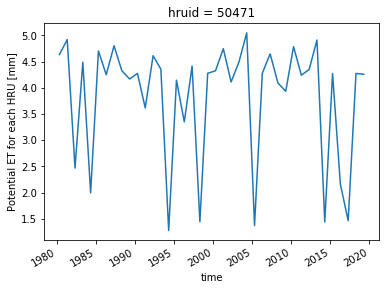

In [5]:
    da.plot()